## Importing Libraries

In [702]:
from pymongo import MongoClient
import pandas as pd
import time
import json
import seaborn as sns
import numpy as np
import os
import geopandas as gp
from cartoframes.viz import Map, Layer, popup_element
from dotenv import load_dotenv
import requests
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
import math



## Linking MongoDB


In [703]:
client = MongoClient("localhost:27017")

In [704]:
client.list_database_names()
db = client["Ironhack"]

In [705]:
db.list_collection_names()

['PROJECT3', 'nyneigh', 'First', 'Lab', 'nyrest']

In [706]:
companys= db.get_collection("Lab")

In [707]:
companys

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Ironhack'), 'Lab')

## Importing filtered CSV

In [9]:
data= pd.read_json ('Labjson.csv')

In [15]:
data.sample(5)

,name,category_code,number_of_employees,description,total_money_raised,investments,offices
238,walabok,games_video,2.0,None,$0,[],[]
1044,Video Game 911,games_video,7.0,Video Game Console Repairs,$0,[],"[{'description': '', 'address1': '411 East Mai..."
988,Saavn,games_video,25.0,South Asian Music Service,$6M,[],"[{'description': 'Corporate Headquarters', 'ad..."
161,Camlink,games_video,4.0,Online Speed Dating,$0,[],"[{'description': '', 'address1': '', 'address2..."
1080,Fictionaut,games_video,2.0,A literary community,$0,[],"[{'description': 'New York', 'address1': '32-1..."


In [11]:
data.columns

Index(['_id', 'name', 'permalink', 'crunchbase_url', 'homepage_url',
       'blog_url', 'blog_feed_url', 'twitter_username', 'category_code',
       'number_of_employees', 'founded_year', 'founded_month', 'founded_day',
       'deadpooled_year', 'deadpooled_month', 'deadpooled_day',
       'deadpooled_url', 'tag_list', 'email_address', 'phone_number',
       'description', 'created_at', 'updated_at', 'overview', 'image',
       'products', 'relationships', 'competitions', 'providerships',
       'total_money_raised', 'funding_rounds', 'investments', 'offices',
       'video_embeds', 'screenshots', 'external_links', 'partners', 'ipo'],
      dtype='object')

## Cleaning the Dataframe

In [12]:
def dropcolumn(df,column):
    df.drop(f"{column}", axis = 1, inplace = True)
    
    return df

In [14]:
columns=['permalink', 'crunchbase_url', 'homepage_url',
       'blog_url', 'blog_feed_url', 'twitter_username',
        'founded_year', 'founded_month', 'founded_day',
       'deadpooled_year', 'deadpooled_month', 'deadpooled_day',
       'deadpooled_url', 'tag_list', 'email_address', 'phone_number',
       'created_at', 'updated_at', 'image',
        'relationships', 'providerships', 'funding_rounds',
       'video_embeds', 'screenshots', 'external_links', 'partners', 'ipo','competitions','overview','_id','products','investments']
for i in columns:
    dropcolumn(data,i)

KeyError: "['permalink'] not found in axis"

In [17]:
data['description'] = data['description'].str.upper()

In [18]:
data['description'] = data['description'].str.extract('(.*GAM.*)')

In [19]:
 data=data.dropna(subset=['description'])

In [ ]:
check=data['total_money_raised'].value_counts()
print(check.to_string())

In [20]:
 data=data.dropna(subset=['total_money_raised'])

In [21]:
data=data.explode('offices')

In [941]:
data

,name,category_code,number_of_employees,description,total_money_raised,offices
22,RockYou,games_video,106.0,SOCIAL GAMING COMPANY,$136M,"{'description': '', 'address1': '585 Broadway'..."
26,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,"{'description': 'San Francisco', 'address1': '..."
26,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,"{'description': 'Huntsville', 'address1': '150..."
46,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,"{'description': '', 'address1': '2 Shaw Alley'..."
58,MocoSpace,games_video,25.0,LARGEST MOBILE GAMES COMMUNITY IN N AMER,$10.5M,"{'description': '', 'address1': '', 'address2'..."
...,...,...,...,...,...,...
1074,G5 Entertainment,games_video,107.0,PUBLISHER AND DEVELOPER OF MOBILE GAMES,$0,"{'description': 'Development Office', 'address..."
1074,G5 Entertainment,games_video,107.0,PUBLISHER AND DEVELOPER OF MOBILE GAMES,$0,"{'description': 'Headquarters', 'address1': 'G..."
1074,G5 Entertainment,games_video,107.0,PUBLISHER AND DEVELOPER OF MOBILE GAMES,$0,"{'description': 'US Marketing Office', 'addres..."
1075,FragBrag,games_video,4.0,VIDEO SHARING FOR GAMERS,$0,NaN


In [23]:
Test=data['offices'].apply(pd.Series)

In [24]:
Test

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,0
22,,585 Broadway,Suite A,94063,Redwood City,CA,USA,37.484619,-122.206893,NaN
26,San Francisco,60 Broadway,,94111,San Francisco,CA,USA,37.787092,-122.399972,NaN
26,Huntsville,150 West Park Loop NW,,35806,Huntsville,AL,USA,NaN,NaN,NaN
46,,2 Shaw Alley,4th Floor,94105,San Francisco,CA,USA,37.786942,-122.401245,NaN
58,,,,02111,Boston,MA,USA,42.350274,-71.058768,NaN
...,...,...,...,...,...,...,...,...,...,...
1074,Development Office,"Moskovskiy prospekt, 179-B",,61037,Kharkov,None,UKR,NaN,NaN,NaN
1074,Headquarters,Grev Turegatan 14,,10247,Stockholm,None,SWE,NaN,NaN,NaN
1074,US Marketing Office,"Suite 136, 1750 Montgomery Street",,94111,San Francisco,CA,USA,NaN,NaN,NaN
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
dropcolumn(Test,'description')

,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,0
22,585 Broadway,Suite A,94063,Redwood City,CA,USA,37.484619,-122.206893,NaN
26,60 Broadway,,94111,San Francisco,CA,USA,37.787092,-122.399972,NaN
26,150 West Park Loop NW,,35806,Huntsville,AL,USA,NaN,NaN,NaN
46,2 Shaw Alley,4th Floor,94105,San Francisco,CA,USA,37.786942,-122.401245,NaN
58,,,02111,Boston,MA,USA,42.350274,-71.058768,NaN
...,...,...,...,...,...,...,...,...,...
1074,"Moskovskiy prospekt, 179-B",,61037,Kharkov,None,UKR,NaN,NaN,NaN
1074,Grev Turegatan 14,,10247,Stockholm,None,SWE,NaN,NaN,NaN
1074,"Suite 136, 1750 Montgomery Street",,94111,San Francisco,CA,USA,NaN,NaN,NaN
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Concatenating Dataframes

In [29]:
Test1=pd.concat([data, Test], axis=1)

In [30]:
Test1.sample()

,name,category_code,number_of_employees,description,total_money_raised,offices,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,0
65,OMGPOP,games_video,50.0,FREE ONLINE MULTIPLAYER GAME,$16.6M,"{'description': '', 'address1': 'SoHo', 'addre...",SoHo,,,New York,NY,USA,40.723384,-74.001704,NaN


In [31]:
columns=['state_code','offices','address2','zip_code','address1']
for i in columns:
    dropcolumn(Test1,i)

In [32]:
Test1 = Test1.iloc[:, :-1]

In [ ]:
def dropcolumn(df,column):
    df.drop(f"{column}", axis = 1, inplace = True)

In [ ]:
def dropna(df,column):
    df=df.dropna(subset=[f'{column}'])
    return df
    

In [33]:
Test1=Test1.dropna(subset=['latitude'])

In [34]:
Test1=Test1.dropna(subset=['longitude'])

In [35]:
Test1=Test1.dropna(subset=['number_of_employees'])

In [37]:
Test1=Test1.dropna(subset=['city'])

## Choosing city

In [944]:
check=Test['city'].value_counts()
check

San Francisco     24
New York           9
                   8
Berlin             4
Los Angeles        4
                  ..
Marina del Rey     1
Roncade TV         1
Culver City        1
Vancouver          1
Stockholm          1
Name: city, Length: 98, dtype: int64

In [38]:
Test1.reset_index(drop=True, inplace=True)

In [40]:
T=Test1.sort_values(by=["city"]) 

In [ ]:
T['city'].value_counts()

In [41]:
T['city'] = T['city'].str.strip()

In [42]:
T['city'] = T['city'].astype(str)

In [43]:
SF=T[T["city"] =='San Francisco']

In [46]:
SF.reset_index(drop=True, inplace=True)

In [54]:
SF

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
0,Shattered Reality Interactive,games_video,10.0,"ONLINE SOCIAL GAMING, MMO",$1.1M,San Francisco,USA,37.783046,-122.394067
1,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,San Francisco,USA,37.787646,-122.402759
2,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,San Francisco,USA,37.787092,-122.399972
3,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,San Francisco,USA,37.786942,-122.401245
4,Rupture,games_video,25.0,GAMING SOCIAL NETWORK,$3M,San Francisco,USA,37.783898,-122.395234
5,Zynga,games_video,115.0,NETWORK OF GAMING APPLICATIONS,$860M,San Francisco,USA,37.765158,-122.404234
6,Serious Business,games_video,22.0,SOCIAL GAME DEVELOPMENT STUDIO,$4M,San Francisco,USA,37.789321,-122.401362
8,Kabam,games_video,650.0,LEADER IN GAMING,$125M,San Francisco,USA,37.394456,-122.078531
9,ngmoco,games_video,150.0,GAMES FOR THE IPHONE,$44.8M,San Francisco,USA,37.770510,-122.401581
10,Shattered Reality Interactive,games_video,10.0,"ONLINE SOCIAL GAMING, MMO",$1.1M,San Francisco,USA,37.783046,-122.394067


## Regex

In [47]:
SF['total_money_raised'] = SF['total_money_raised'].str.extract('(.*M|B)')

C:\Users\mataf\AppData\Local\Temp\ipykernel_17104\2401967230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF['total_money_raised'] = SF['total_money_raised'].str.extract('(.*M|B)')


In [ ]:
SF

In [48]:
SF=SF.dropna(subset=['total_money_raised'])

In [ ]:
SF

In [108]:
SF.reset_index(drop=True, inplace=True)

## Creating a subset of the Companies

In [112]:
SF_sub=SF[['name','longitude','latitude']]

In [192]:
SF_sub

,name,longitude,latitude
0,Shattered Reality Interactive,-122.394067,37.783046
1,Exent,-122.402759,37.787646
2,Curse,-122.399972,37.787092
3,Kongregate,-122.401245,37.786942
4,Rupture,-122.395234,37.783898
5,Zynga,-122.404234,37.765158
6,Serious Business,-122.401362,37.789321
7,Kabam,-122.078531,37.394456
8,ngmoco,-122.401581,37.770510
9,Shattered Reality Interactive,-122.394067,37.783046


# APIs and mapping


In [50]:
load_dotenv()

True

In [51]:
token_fsq = os.getenv("token")

In [947]:
map_SF= Map(location=[Shatt_lat, Shatt_lon], zoom_start=15)

In [955]:


url = "https://api.foursquare.com/v3/places/search?query=restaurante&ll=37.783046%2C-122.394067&sort=DISTANCE&radius=800"

headers = {
    "accept": "application/json",
    "Authorization": token_fsq
}

response = requests.get(url, headers=headers).json()


In [956]:
for index, row in SF_sub.iterrows():
    
    
    Companies = {"location": [row["latitude"], row["longitude"]], "tooltip": row["name"]}
    icon = Icon (
            color="blue",
            opacity = 0.6,
            prefix = "fa",
            icon = "building-o",
            icon_color = "black",
            icon_size=(30, 30)
        )
    
    new_marker = Marker(**Companies, icon = icon, radius = 2)
    
    
    new_marker.add_to(map_SF)
    
    


In [954]:
new_list = []
for i in response["results"]:
    
    name = i["name"]
    lat = i["geocodes"]["main"]["latitude"]
    lon = i["geocodes"]["main"]["longitude"]
    distance = i["distance"]     
  
    
    new_list.append({"name":name, "latitude":lat, "longitude":lon, "distance":distance})
    
new_list

[{'name': 'Palette',
  'latitude': 37.78175,
  'longitude': -122.401983,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.657508, -122.397584]}}},
 {'name': 'Anomaly SF',
  'latitude': 37.779298,
  'longitude': -122.397991,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.657508, -122.397584]}}},
 {'name': 'Fogomarket',
  'latitude': 37.784981,
  'longitude': -122.39988,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.657508, -122.397584]}}},
 {'name': 'Soma Garden',
  'latitude': 37.788099,
  'longitude': -122.397124,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.657508, -122.397584]}}},
 {'name': 'Gotham Club Dining Room',
  'latitude': 37.778015,
  'longitude': -122.388625,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.657508, -122.397584]}}},
 {'name': 'TBG Cafe',
  'latitude': 37.78282,
  'longitude': -122.393515,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.657508, -122.3975

In [957]:
Resto_df= pd.DataFrame(new_list)

In [958]:
for index, row in Resto_df.iterrows():
    
   
    Resto = {"location": [row["latitude"], row["longitude"]], "tooltip": row["name"]}
    icon = Icon (
            color="red",
            opacity = 0.6,
            prefix = "fa",
            icon = "cutlery",
            icon_color = "white",
            icon_size=(30, 30)
        )
    
    new_marker_rest = Marker(**Resto, icon = icon, radius = 2)
    
    
    new_marker_rest.add_to(map_SF)

In [959]:
url_air = "https://api.foursquare.com/v3/places/search?query=airport&ll=37.787646%2C-122.402759&sort=DISTANCE"

headers = {
    "accept": "application/json",
    "Authorization": token_fsq
}

response_air = requests.get(url_air, headers=headers).json()


In [960]:
response_air

{'results': [{'fsq_id': '49d2c646f964a520d45b1fe3',
   'categories': [{'id': 19009,
     'name': 'Lodging',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/default_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 121,
   'geocodes': {'main': {'latitude': 37.786704, 'longitude': -122.402992}},
   'link': '/v3/places/49d2c646f964a520d45b1fe3',
   'location': {'address': '50 3rd St',
    'census_block': '060750615012005',
    'country': 'US',
    'cross_street': 'btwn Market St & Mission St',
    'dma': 'San Francisco-Oakland-San Jose',
    'formatted_address': '50 3rd St (btwn Market St & Mission St), San Francisco, CA 94103',
    'locality': 'San Francisco',
    'neighborhood': ['Financial District'],
    'postcode': '94103',
    'region': 'CA'},
   'name': 'Hyatt Regency San Francisco Downtown Soma',
   'related_places': {'children': [{'fsq_id': '518da8e3498ef0084a743ca4',
      'name': 'MaSo'},
     {'fsq_id': '59fd312a78782c1f86db47ec', 'name': 'Pa

In [618]:
air_list = []
for i in response_air["results"]:
    
    name = i["name"]
    lat = i["geocodes"]["main"]["latitude"]
    lon = i["geocodes"]["main"]["longitude"]
    distance = i["distance"]    
   
    
    air_list.append({"name":name, "latitude":lat, "longitude":lon, "distance":distance})
    
air_list

[{'name': 'San Francisco International Airport (SFO)',
  'latitude': 37.624123,
  'longitude': -122.395506,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.624123, -122.395506]}}},
 {'name': 'San Francisco International Airport (SFO)',
  'latitude': 37.624123,
  'longitude': -122.395506,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.624123, -122.395506]}}},
 {'name': 'AC Hotel by Marriott San Francisco Airport/Oyster Point Waterfront',
  'latitude': 37.664447,
  'longitude': -122.395512,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.664447, -122.395512]}}},
 {'name': 'Oakland International Airport (OAK)',
  'latitude': 37.7117,
  'longitude': -122.212997,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.7117, -122.212997]}}},
 {'name': 'Emirates Sky Cargo',
  'latitude': 37.82484,
  'longitude': -122.314208,
  'type': {'typepoint': {'type': 'Point',
    'coordinates': [37.82484, -122.314208]}}},
 {'name': 'New T-Han

In [619]:
air_df=pd.DataFrame(air_list)

In [620]:
air_df=air_df.loc[(1,3),:]

In [621]:
air_df.reset_index(drop=True, inplace=True)

In [622]:
air_df

,name,latitude,longitude,type
0,San Francisco International Airport (SFO),37.624123,-122.395506,"{'typepoint': {'type': 'Point', 'coordinates':..."
1,Oakland International Airport (OAK),37.711700,-122.212997,"{'typepoint': {'type': 'Point', 'coordinates':..."


In [967]:
url_vegan = "https://api.foursquare.com/v3/places/search?ll=37.787646%2C-122.402759&categories=13377&sort=DISTANCE"

headers = {
    "accept": "application/json",
    "Authorization": token_fsq
}

response_vegan = requests.get(url_vegan, headers=headers).json()

In [968]:
response_vegan

{'results': [{'fsq_id': '57fbb40ecd1057f331ffd3e3',
   'categories': [{'id': 13065,
     'name': 'Restaurant',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
      'suffix': '.png'}},
    {'id': 13377,
     'name': 'Vegan and Vegetarian Restaurant',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_',
      'suffix': '.png'}}],
   'chains': [{'id': 'e9b6ff79-62b5-4a0b-9ef6-b9bf15f3b53f',
     'name': 'sweetgreen'}],
   'distance': 364,
   'geocodes': {'main': {'latitude': 37.787182, 'longitude': -122.398432},
    'roof': {'latitude': 37.787182, 'longitude': -122.398432}},
   'link': '/v3/places/57fbb40ecd1057f331ffd3e3',
   'location': {'address': '171 2nd St',
    'census_block': '060750615011007',
    'country': 'US',
    'cross_street': '',
    'dma': 'San Francisco-Oakland-San Jose',
    'formatted_address': '171 2nd St, San Francisco, CA 94105',
    'locality': 'San Francisco',
    'neighborhood': ['Chinatown'],
    'p

In [970]:
new_list_vegan = []
for i in response_vegan["results"]:
    
    name = i["name"]
    lat = i["geocodes"]["main"]["latitude"]
    lon = i["geocodes"]["main"]["longitude"]
    distance = i["distance"]      
   
    
    new_list_vegan.append({"name":name, "latitude":lat, "longitude":lon, "distance":distance})
new_list_vegan

[{'name': 'Sweetgreen',
  'latitude': 37.787182,
  'longitude': -122.398432,
  'distance': 364},
 {'name': 'Mixt Greens',
  'latitude': 37.79451,
  'longitude': -122.401732,
  'distance': 745},
 {'name': "SF Brew Fest N' Vegan Eats Invitational",
  'latitude': 37.785634,
  'longitude': -122.393036,
  'distance': 882},
 {'name': 'Millenium Restaurant',
  'latitude': 37.78688,
  'longitude': -122.412957,
  'distance': 899},
 {'name': 'Enjoy Vegetarian Restaurant',
  'latitude': 37.795717,
  'longitude': -122.405173,
  'distance': 932},
 {'name': 'Sweetgreen',
  'latitude': 37.789634,
  'longitude': -122.391765,
  'distance': 979},
 {'name': 'The Flying Falafel',
  'latitude': 37.78124,
  'longitude': -122.411217,
  'distance': 1017},
 {'name': 'Ginger Bowls',
  'latitude': 37.776849,
  'longitude': -122.402842,
  'distance': 1188},
 {'name': 'Donut Farm',
  'latitude': 37.795336,
  'longitude': -122.393463,
  'distance': 1207},
 {'name': 'Tender',
  'latitude': 37.786329,
  'longitude': 

In [971]:
vegan_df_=pd.DataFrame(new_list_vegan)

In [972]:
vegan_df_

,name,latitude,longitude,distance
0,Sweetgreen,37.787182,-122.398432,364
1,Mixt Greens,37.794510,-122.401732,745
2,SF Brew Fest N' Vegan Eats Invitational,37.785634,-122.393036,882
3,Millenium Restaurant,37.786880,-122.412957,899
4,Enjoy Vegetarian Restaurant,37.795717,-122.405173,932
5,Sweetgreen,37.789634,-122.391765,979
6,The Flying Falafel,37.781240,-122.411217,1017
7,Ginger Bowls,37.776849,-122.402842,1188
8,Donut Farm,37.795336,-122.393463,1207
9,Tender,37.786329,-122.417353,1287


In [979]:
for index, row in vegan_df.iterrows():
    
   
    vegan = {"location": [row["latitude"], row["longitude"]], "tooltip": row["name"]}
    icon = Icon (
            color="orange",
            opacity = 0.6,
            prefix = "fa",
            icon = "apple",
            icon_color = "green",
            icon_size=(30, 30)
        )
    
    new_marker_vegan = Marker(**vegan, icon = icon, radius = 2)
    
    
    new_marker_vegan.add_to(map_SF)

In [980]:
url_star = "https://api.foursquare.com/v3/places/search?query=starbucks&ll=37.787646%2C-122.402759&sort=DISTANCE"

headers = {
    "accept": "application/json",
    "Authorization": token_fsq
}

response_star = requests.get(url_star, headers=headers).json()



In [1003]:
new_list_star = []
for i in response_star["results"]:
    
    name = i["name"]
    lat = i["geocodes"]["main"]["latitude"]
    lon = i["geocodes"]["main"]["longitude"]
    distance = i["distance"]    
    
    
    new_list_star.append({"name":name, "latitude":lat, "longitude":lon, "distance":distance})
new_list_star

[{'name': 'Starbucks',
  'latitude': 37.787664,
  'longitude': -122.401113,
  'distance': 144},
 {'name': 'Starbucks',
  'latitude': 37.789599,
  'longitude': -122.401872,
  'distance': 225},
 {'name': 'Starbucks',
  'latitude': 37.786145,
  'longitude': -122.405612,
  'distance': 306},
 {'name': 'Starbucks',
  'latitude': 37.78447,
  'longitude': -122.404008,
  'distance': 357},
 {'name': 'Starbucks',
  'latitude': 37.790652,
  'longitude': -122.403869,
  'distance': 369},
 {'name': 'Starbucks',
  'latitude': 37.784199,
  'longitude': -122.404135,
  'distance': 394},
 {'name': 'Starbucks',
  'latitude': 37.765871,
  'longitude': -122.40327,
  'distance': 400},
 {'name': 'Starbucks',
  'latitude': 37.789293,
  'longitude': -122.406729,
  'distance': 404},
 {'name': 'Starbucks',
  'latitude': 37.790448,
  'longitude': -122.405722,
  'distance': 406},
 {'name': 'Starbucks',
  'latitude': 37.786534,
  'longitude': -122.408216,
  'distance': 420}]

In [977]:
star_df=pd.DataFrame(new_list_star)

In [978]:
star_df

,name,latitude,longitude,distance
0,Starbucks,37.787664,-122.401113,144
1,Starbucks,37.789599,-122.401872,225
2,Starbucks,37.786145,-122.405612,306
3,Starbucks,37.786145,-122.405612,306
4,Starbucks,37.784470,-122.404008,357
5,Starbucks,37.790652,-122.403869,369
6,Starbucks,37.784199,-122.404135,394
7,Starbucks,37.784199,-122.404135,394
8,Starbucks,37.765871,-122.403270,400
9,Starbucks,37.789293,-122.406729,404


In [982]:
for index, row in star_df.iterrows():
    
    
    StarB = {"location": [row["latitude"], row["longitude"]], "tooltip": row["name"]}
    icon = Icon (
            color="green",
            opacity = 0.6,
            prefix = "fa",
            icon = "coffee",
            icon_color = "white",
            icon_size=(30, 30)
        )
    
    new_marker_star = Marker(**StarB, icon = icon, radius = 2)
    
    
    new_marker_star.add_to(map_SF)

In [983]:
url_kinder = "https://api.foursquare.com/v3/places/search?ll=37.787646%2C-122.402759&categories=12056&sort=DISTANCE"

headers = {
    "accept": "application/json",
    "Authorization": token_fsq
}

response_kinder = requests.get(url_kinder, headers=headers).json()



In [984]:
new_list_kinder = []
for i in response_kinder["results"]:
    
    name = i["name"]
    lat = i["geocodes"]["main"]["latitude"]
    lon = i["geocodes"]["main"]["longitude"]
    distance = i["distance"]    
    
    
    new_list_kinder.append({"name":name, "latitude":lat, "longitude":lon, "distance":distance})
new_list_kinder

[{'name': 'Seabird Preschool',
  'latitude': 37.797109,
  'longitude': -122.407907,
  'distance': 1148},
 {'name': 'Apple Tree Preschool',
  'latitude': 37.777038,
  'longitude': -122.405075,
  'distance': 1206},
 {'name': 'Spazio Italiano',
  'latitude': 37.801681,
  'longitude': -122.411332,
  'distance': 1739},
 {'name': 'the Modern PlaySpace',
  'latitude': 37.771699,
  'longitude': -122.404402,
  'distance': 1777},
 {'name': 'Montessori House Of Children',
  'latitude': 37.785183,
  'longitude': -122.423333,
  'distance': 1846},
 {'name': 'Presidio Knolls School',
  'latitude': 37.773306,
  'longitude': -122.413743,
  'distance': 1863},
 {'name': 'LePort School',
  'latitude': 37.776344,
  'longitude': -122.418868,
  'distance': 1882},
 {'name': 'Potrero Kids Daniel Webster Preschool',
  'latitude': 37.760604,
  'longitude': -122.396079,
  'distance': 3061},
 {'name': 'The Little School',
  'latitude': 37.785089,
  'longitude': -122.444615,
  'distance': 3688},
 {'name': 'Sapling 

In [985]:
kinder_df=pd.DataFrame(new_list_kinder)

In [350]:
kinder_df

,name,latitude,longitude,type
0,Montessori House Of Children,37.785183,-122.423333,"{'typepoint': {'type': 'Point', 'coordinates':..."
1,Presidio Knolls School,37.773306,-122.413743,"{'typepoint': {'type': 'Point', 'coordinates':..."
2,LePort School,37.776344,-122.418868,"{'typepoint': {'type': 'Point', 'coordinates':..."
3,Preschool Learning Center-Phoebe Hearst,37.782779,-122.427850,"{'typepoint': {'type': 'Point', 'coordinates':..."
4,The Little School,37.785089,-122.444615,"{'typepoint': {'type': 'Point', 'coordinates':..."
5,Rosenberg Early Childhood Center of the Jccsf,37.784703,-122.459428,"{'typepoint': {'type': 'Point', 'coordinates':..."
6,Argonne Early Education School,37.774025,-122.474271,"{'typepoint': {'type': 'Point', 'coordinates':..."
7,The Scandinavian School In San Francisco,37.746681,-122.458099,"{'typepoint': {'type': 'Point', 'coordinates':..."
8,Little Bear School,37.723416,-122.438022,"{'typepoint': {'type': 'Point', 'coordinates':..."
9,Playmates Cooperative Nursery School,37.743159,-122.500079,"{'typepoint': {'type': 'Point', 'coordinates':..."


In [1040]:
for index, row in kinder_df.iterrows():
    
    
    kinder = {"location": [row["latitude"], row["longitude"]], "tooltip": row["name"]}
    icon = Icon (
            color="red",
            opacity = 0.6,
            prefix = "fa",
            icon = "child",
            icon_color = "black",
            icon_size=(30, 30)
        )
    
    new_marker_kinder = Marker(**kinder, icon = icon, radius = 2)
    
    
    new_marker_kinder.add_to(map_SF)

In [987]:
url_basket = "https://api.foursquare.com/v3/places/search?ll=37.787646%2C-122.402759&categories=18008&sort=DISTANCE"

headers = {
    "accept": "application/json",
    "Authorization": token_fsq
}

response_basket = requests.get(url_basket, headers=headers).json()

In [988]:
new_list_basket = []
for i in response_basket["results"]:
    
    name = i["name"]
    lat = i["geocodes"]["main"]["latitude"]
    lon = i["geocodes"]["main"]["longitude"]
    distance = i["distance"]
    
    new_list_basket.append({"name":name, "latitude":lat, "longitude":lon, "distance":distance})
new_list_basket

[{'name': 'Soma Rec Center',
  'latitude': 37.778838,
  'longitude': -122.406328,
  'distance': 1009},
 {'name': 'Berry Basketball Courts',
  'latitude': 37.772031,
  'longitude': -122.397898,
  'distance': 1799},
 {'name': 'Arterra Mission Bay',
  'latitude': 37.771896,
  'longitude': -122.397532,
  'distance': 1809},
 {'name': 'Alice Marble Basketball Court',
  'latitude': 37.801395,
  'longitude': -122.420205,
  'distance': 2172},
 {'name': 'Hamilton Basketball Courts',
  'latitude': 37.784569,
  'longitude': -122.435625,
  'distance': 2899},
 {'name': 'NBA Nation',
  'latitude': 37.759168,
  'longitude': -122.412335,
  'distance': 3248},
 {'name': 'Dolores Park Basketball Courts',
  'latitude': 37.760956,
  'longitude': -122.427849,
  'distance': 3683},
 {'name': 'Golden Gate Park Panhandle Basketball Courts',
  'latitude': 37.771955,
  'longitude': -122.445915,
  'distance': 3830},
 {'name': 'Panhandle Basketball Courts',
  'latitude': 37.768679,
  'longitude': -122.453452,
  'dis

In [357]:
basket_df=pd.DataFrame(new_list_basket)

In [1057]:
for index, row in basket_df.iterrows():
    
    
    Basket = {"location": [row["latitude"], row["longitude"]], "tooltip": row["name"]}
    icon = Icon (
            color="white",
            opacity = 0.6,
            prefix = "fa",
            icon = "futbol-o",
            icon_color = "orange",
            icon_size=(30, 30)
        )
    
    new_marker_basket = Marker(**Basket, icon = icon, radius = 2)
    
    
    new_marker_basket.add_to(map_SF)

In [990]:
url_dog = "https://api.foursquare.com/v3/places/search?ll=37.787646%2C-122.402759&categories=11134&sort=DISTANCE"

headers = {
    "accept": "application/json",
    "Authorization": token_fsq
}

response_dog = requests.get(url_dog, headers=headers).json()


In [993]:
new_list_dog = []
for i in response_dog["results"]:
    
    name = i["name"]
    lat = i["geocodes"]["main"]["latitude"]
    lon = i["geocodes"]["main"]["longitude"]
    distance = i["distance"]    
        
    new_list_dog.append({"name":name, "latitude":lat, "longitude":lon,"distance":distance})
new_list_dog

[{'name': 'Pawtrero Hill BathHouse & Feed',
  'latitude': 37.78382,
  'longitude': -122.389322,
  'distance': 1251},
 {'name': 'Doggie Day Spaw',
  'latitude': 37.799227,
  'longitude': -122.409681,
  'distance': 1433},
 {'name': 'Furry Tales',
  'latitude': 37.776754,
  'longitude': -122.392943,
  'distance': 1508},
 {'name': 'Tefani & So. Dogcare',
  'latitude': 37.772824,
  'longitude': -122.410202,
  'distance': 1762},
 {'name': 'Russian Hill Dog Grooming',
  'latitude': 37.798507,
  'longitude': -122.419103,
  'distance': 1881},
 {'name': 'Healthy Spot',
  'latitude': 37.772602,
  'longitude': -122.391695,
  'distance': 1937},
 {'name': 'Bow Wow Meow',
  'latitude': 37.796544,
  'longitude': -122.421711,
  'distance': 1951},
 {'name': 'Wag Hotels San Francisco',
  'latitude': 37.768475,
  'longitude': -122.414103,
  'distance': 2320},
 {'name': 'The Dog Barber',
  'latitude': 37.770428,
  'longitude': -122.424897,
  'distance': 2762},
 {'name': "Pet's Best Friend",
  'latitude': 3

In [992]:
dog_df=pd.DataFrame(new_list_dog)

In [1006]:
dog_df=pd.DataFrame(new_list_dog)
for index, row in dog_df.iterrows():
    
    
    
    Grooming= {"location": [row["latitude"], row["longitude"]], "tooltip": row["name"]}
    icon = Icon (
            color="white",
            opacity = 0.6,
            prefix = "fa",
            icon = "paw",
            icon_color = "black",
            icon_size=(30, 30)
        )
    
    new_marker_dog = Marker(**Grooming, icon = icon, radius = 2)
    
    
    new_marker_dog.add_to(map_SF)

In [998]:
url_night = "https://api.foursquare.com/v3/places/search?ll=37.787646%2C-122.402759&categories=10032&sort=DISTANCE"

headers = {
    "accept": "application/json",
    "Authorization": token_fsq
}

response_night= requests.get(url_night, headers=headers).json()

In [999]:
new_list_night = []
for i in response_night["results"]:
    
    name = i["name"]
    lat = i["geocodes"]["main"]["latitude"]
    lon = i["geocodes"]["main"]["longitude"]
    distance = i["distance"]    
  
    
    new_list_night.append({"name":name, "latitude":lat, "longitude":lon, "distance":distance})
new_list_night

[{'name': 'The View',
  'latitude': 37.785207,
  'longitude': -122.404625,
  'distance': 291},
 {'name': 'Southside Spirit House',
  'latitude': 37.787118,
  'longitude': -122.397568,
  'distance': 452},
 {'name': 'Temple Nightclub',
  'latitude': 37.787904,
  'longitude': -122.397112,
  'distance': 486},
 {'name': 'City Nights',
  'latitude': 37.782039,
  'longitude': -122.397771,
  'distance': 767},
 {'name': 'Monarch',
  'latitude': 37.780935,
  'longitude': -122.408387,
  'distance': 896},
 {'name': 'Club Six',
  'latitude': 37.781406,
  'longitude': -122.40949,
  'distance': 911},
 {'name': 'Executive Referral Services',
  'latitude': 37.787754,
  'longitude': -122.390508,
  'distance': 1075},
 {'name': '1015 Folsom',
  'latitude': 37.778128,
  'longitude': -122.405784,
  'distance': 1082},
 {'name': 'Saw Entertainment',
  'latitude': 37.797451,
  'longitude': -122.405562,
  'distance': 1117},
 {'name': "Larry Flynt's Hustler Club",
  'latitude': 37.797451,
  'longitude': -122.405

In [1052]:
night_df=pd.DataFrame(new_list_night)
for index, row in night_df.iterrows():
    
    
    Clubs = {"location": [row["latitude"], row["longitude"]], "tooltip": row["name"]}
    icon = Icon (
            color="black",
            opacity = 0.6,
            prefix = "fa",
            icon = "moon-o",
            icon_color = "yellow",
            icon_size=(30, 30)
        )
  
    new_marker_night = Marker(**Clubs, icon = icon, radius = 2)
    
  
    new_marker_night.add_to(map_SF)

## Delimiting area

In [1048]:
folium.TileLayer('stamenwatercolor').add_to(map_SF)

In [1058]:
map_SF

In [1008]:
SF

,name,category_code,number_of_employees,description,total_money_raised,city,country_code,latitude,longitude
0,Shattered Reality Interactive,games_video,10.0,"ONLINE SOCIAL GAMING, MMO",$1.1M,San Francisco,USA,37.783046,-122.394067
1,Exent,games_video,100.0,GAMES ON DEMAND LEADER,$3M,San Francisco,USA,37.787646,-122.402759
2,Curse,games_video,58.0,ONLINE GAMES MEDIA COMPANY,$12M,San Francisco,USA,37.787092,-122.399972
3,Kongregate,games_video,20.0,GAMING SOCIAL NETWORK,$19M,San Francisco,USA,37.786942,-122.401245
4,Rupture,games_video,25.0,GAMING SOCIAL NETWORK,$3M,San Francisco,USA,37.783898,-122.395234
5,Zynga,games_video,115.0,NETWORK OF GAMING APPLICATIONS,$860M,San Francisco,USA,37.765158,-122.404234
6,Serious Business,games_video,22.0,SOCIAL GAME DEVELOPMENT STUDIO,$4M,San Francisco,USA,37.789321,-122.401362
7,Kabam,games_video,650.0,LEADER IN GAMING,$125M,San Francisco,USA,37.394456,-122.078531
8,ngmoco,games_video,150.0,GAMES FOR THE IPHONE,$44.8M,San Francisco,USA,37.770510,-122.401581
9,Shattered Reality Interactive,games_video,10.0,"ONLINE SOCIAL GAMING, MMO",$1.1M,San Francisco,USA,37.783046,-122.394067


In [535]:
SFF=SF.loc[(1,6,3,2),:]

In [638]:
air_df['Distance'] =Distance

ValueError: Length of values (1) does not match length of index (2)

In [640]:
air_df

,name,latitude,longitude,type,Distance
0,San Francisco International Airport (SFO),37.624123,-122.395506,"{'typepoint': {'type': 'Point', 'coordinates':...",10492
1,Oakland International Airport (OAK),37.711700,-122.212997,"{'typepoint': {'type': 'Point', 'coordinates':...",16454


## Checking distances

In [1009]:
list_companies=list(SFF['name'])

In [1010]:
list_companies

['Exent', 'Serious Business', 'Kongregate', 'Curse']

In [665]:
list_companies_lat=list(SFF['latitude'])

In [664]:
list_companies_lon=list(SFF['longitude'])

In [666]:
list_companies_lat

[37.787646, 37.7893215, 37.786942, 37.787092]

In [686]:
def get_dist_category(latitude,longitude,category):

    url = f"https://api.foursquare.com/v3/places/search?ll={latitude}%2C{longitude}&categories={category}"

    headers = {
        "accept": "application/json",
        "Authorization":token_fsq}
    response = requests.get(url, headers=headers).json()
    newlist=[]
    for lista in response["results"]:
        distance = lista["distance"]
        newlist.append(distance)

    return newlist

In [688]:
def get_dist_query(latitude,longitude,query):

    url = f"https://api.foursquare.com/v3/places/nearby?ll={latitude}%2C{longitude}&query={query}"

    headers = {
        "accept": "application/json",
        "Authorization": token_fsq}
    response = requests.get(url, headers=headers).json()
    newlist=[]
    for lista in response["results"]:
        distance = lista["distance"]
        newlist.append(distance)

    return newlist

## Scoring

In [687]:
Exent_vegan_d=get_dist_category(list_companies_lat[0],list_companies_lon[0],13377)
Serious_vegan_d=get_dist_category(list_companies_lat[1],list_companies_lon[1],13377)
Kong_vegan_d=get_dist_category(list_companies_lat[2],list_companies_lon[2],13377)
Curse_vegan_d=get_dist_category(list_companies_lat[3],list_companies_lon[3],13377)

In [689]:
Exent_star_d=get_dist_query(list_companies_lat[0],list_companies_lon[0],'starbucks')
Serious_star_d=get_dist_query(list_companies_lat[1],list_companies_lon[1],'starbucks')
Kong_star_d=get_dist_query(list_companies_lat[2],list_companies_lon[2],'starbucks')
Curse_star_d=get_dist_query(list_companies_lat[3],list_companies_lon[3],'starbucks')

In [691]:
Exent_kinder_d=get_dist_category(list_companies_lat[0],list_companies_lon[0],12056)
Serious_kinder_d=get_dist_category(list_companies_lat[1],list_companies_lon[1],12056)
Kong_kinder_d=get_dist_category(list_companies_lat[2],list_companies_lon[2],12056)
Curse_kinder_d=get_dist_category(list_companies_lat[3],list_companies_lon[3],12056)

In [692]:
Exent_basket_d=get_dist_category(list_companies_lat[0],list_companies_lon[0],18008)
Serious_basket_d=get_dist_category(list_companies_lat[1],list_companies_lon[1],18008)
Kong_basket_d=get_dist_category(list_companies_lat[2],list_companies_lon[2],18008)
Curse_basket_d=get_dist_category(list_companies_lat[3],list_companies_lon[3],18008)

In [693]:
Exent_dog_d=get_dist_category(list_companies_lat[0],list_companies_lon[0],11134)
Serious_dog_d=get_dist_category(list_companies_lat[1],list_companies_lon[1],11134)
Kong_dog_d=get_dist_category(list_companies_lat[2],list_companies_lon[2],11134)
Curse_dog_d=get_dist_category(list_companies_lat[3],list_companies_lon[3],11134)

In [694]:
Exent_night_d=get_dist_category(list_companies_lat[0],list_companies_lon[0],10032)
Serious_night_d=get_dist_category(list_companies_lat[1],list_companies_lon[1],10032)
Kong_night_d=get_dist_category(list_companies_lat[2],list_companies_lon[2],10032)
Curse_night_d=get_dist_category(list_companies_lat[3],list_companies_lon[3],10032)

In [815]:
def Score(dist_list):
    Scoring=0
    for i in dist_list:
        if i<100:
            Scoring+=50
        elif 100<i<200:
            Scoring+=30
        elif 200<i<300:
            Scoring+=20
        elif 300<i<600:
            Scoring+=10
        
    return Scoring      

In [830]:
Exent_Score= Score(Exent_vegan_d)*1+Score(Exent_star_d)*10+Score(Exent_kinder_d)*26+Score(Exent_basket_d)+Score(Exent_dog_d)+Score(Exent_night_d)*87

In [832]:
Serious_Score= Score(Serious_vegan_d)*1+Score(Serious_star_d)*10+Score(Serious_kinder_d)*26+Score(Serious_basket_d)+Score(Serious_dog_d)+Score(Serious_night_d)*87

In [833]:
Kong_Score= Score(Kong_vegan_d)*1+Score(Kong_star_d)*10+Score(Kong_kinder_d)*26+Score(Kong_basket_d)+Score(Kong_dog_d)+Score(Kong_night_d)*87

In [834]:
Curse_Score= Score(Curse_vegan_d)*1+Score(Curse_star_d)*10+Score(Curse_kinder_d)*26+Score(Curse_basket_d)+Score(Curse_dog_d)+Score(Curse_night_d)*87

In [842]:
print(f'Exent {Exent_Score}')
print(f'Serious Business {Serious_Score}')
print(f'Kongregate {Kong_Score}')
print(f'Curse {Curse_Score}')

Exent 3250
Serious Business 2980
Kongregate 2190
Curse 2100


## Visualizing results

In [1012]:
keys = ['Exent', 'Serious Business', 'Kongregate','Curse']
values = [3250, 2980, 2190,2100]

def create_dictionary(keys, values):
    result = {} 
    for key, value in zip(keys, values):
        result[key] = value
    return result


In [1013]:
create_dictionary(keys,values)

{'Exent': 3250, 'Serious Business': 2980, 'Kongregate': 2190, 'Curse': 2100}

In [1021]:
Table=create_dictionary(keys,values)

In [1022]:
Table=pd.DataFrame(Table,index=[1,2,3,4])

In [1023]:
Table

,Exent,Serious Business,Kongregate,Curse
1,3250,2980,2190,2100
2,3250,2980,2190,2100
3,3250,2980,2190,2100
4,3250,2980,2190,2100


In [1034]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (5.,5.)})
sns.set_style("whitegrid")    

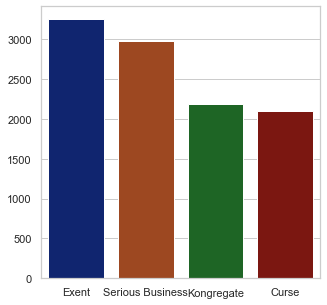

In [1068]:
Scoringmap=sns.barplot(data=Table,palette='dark')

In [1051]:
map_SF.save("./index.html")

In [1069]:
Scoringmap.figure.savefig('Images/Scoring.png', dpi=1000)